### 1)선형회귀

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('./data/LinearRegressionData.csv')
df.head(3)

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14


In [18]:
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [17]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

### 인공지능 선형 회귀 모델

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [23]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [24]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

In [25]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

### 2)선형회귀 시각화

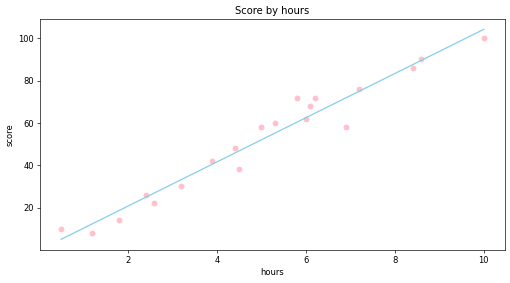

In [32]:
plt.figure(figsize=(10, 5), dpi=60)
plt.scatter(X, y, color='pink')
plt.plot(X, y_pred, color='skyblue')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [35]:
reg.predict([[9], [10], [5]])

array([ 93.77478776, 104.2184847 ,  52.        ])

In [37]:
m = reg.coef_
m

array([10.44369694])

In [38]:
b=reg.intercept_
b

-0.218484702867201

In [39]:
y=m * 9+ b
y

array([93.77478776])

### 3) 데이터 세트 분리

In [44]:
df=pd.read_csv('./data/LinearRegressionData.csv')
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [48]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [49]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [50]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

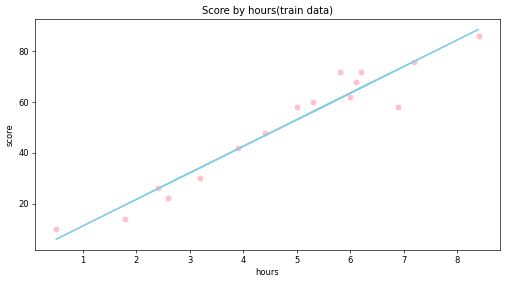

In [53]:
y_pred=reg.predict(X_train)
plt.figure(figsize=(10, 5), dpi=60)
plt.scatter(X_train, y_train, color='pink')
plt.plot(X_train, y_pred, color='skyblue')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

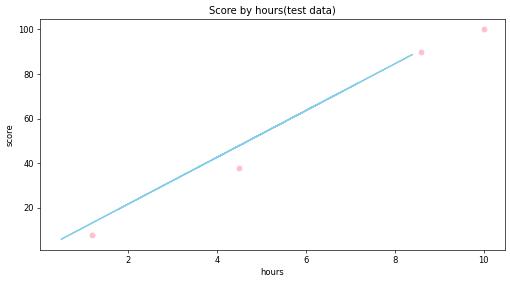

In [55]:
plt.figure(figsize=(10, 5), dpi=60)
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_train, y_pred, color='skyblue')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [56]:
reg.coef_

array([10.49161294])

In [57]:
reg.intercept_

0.6115562905169369

In [58]:
reg.score(X_train, y_train)

0.9356663661221668

In [59]:
reg.score(X_test, y_test)

0.9727616474310156

### 4)경사 하강법

In [61]:
X_train, y_train

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64))

In [78]:
from sklearn.linear_model import SGDRegressor
sr=SGDRegressor(max_iter=150, eta0=0.01, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(max_iter=150, random_state=0, verbose=1)

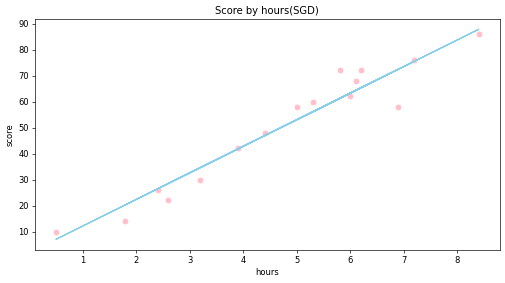

In [79]:
y_pred=sr.predict(X_train)
plt.figure(figsize=(10, 5), dpi=60)
plt.scatter(X_train, y_train, color='pink')
plt.plot(X_train, y_pred, color='skyblue')
plt.title('Score by hours(SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [65]:
sr.score(X_train, y_train)

0.935255091722714

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [6]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [7]:
reg.predict([[9]])

array([93.77478776])